# LU IGI

## Making a model

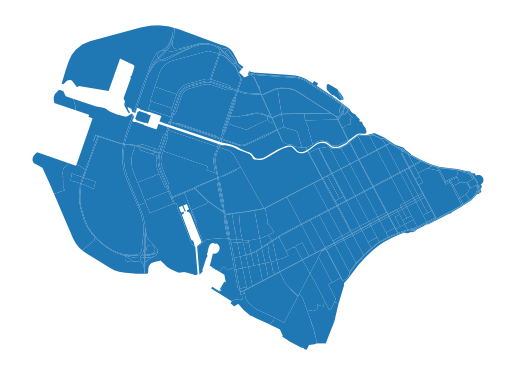

In [1]:
import osmnx as ox
import geopandas as gpd

blocks_gdf = gpd.read_parquet('data/spb_blocks.parquet')
blocks_gdf.head()
clip_gdf = ox.features_from_place('Санкт-Петербург', tags={'name':'Василеостровский район'}).to_crs(blocks_gdf.crs)
blocks_gdf = blocks_gdf[blocks_gdf.intersects(clip_gdf.union_all())]
blocks_gdf.plot().set_axis_off()

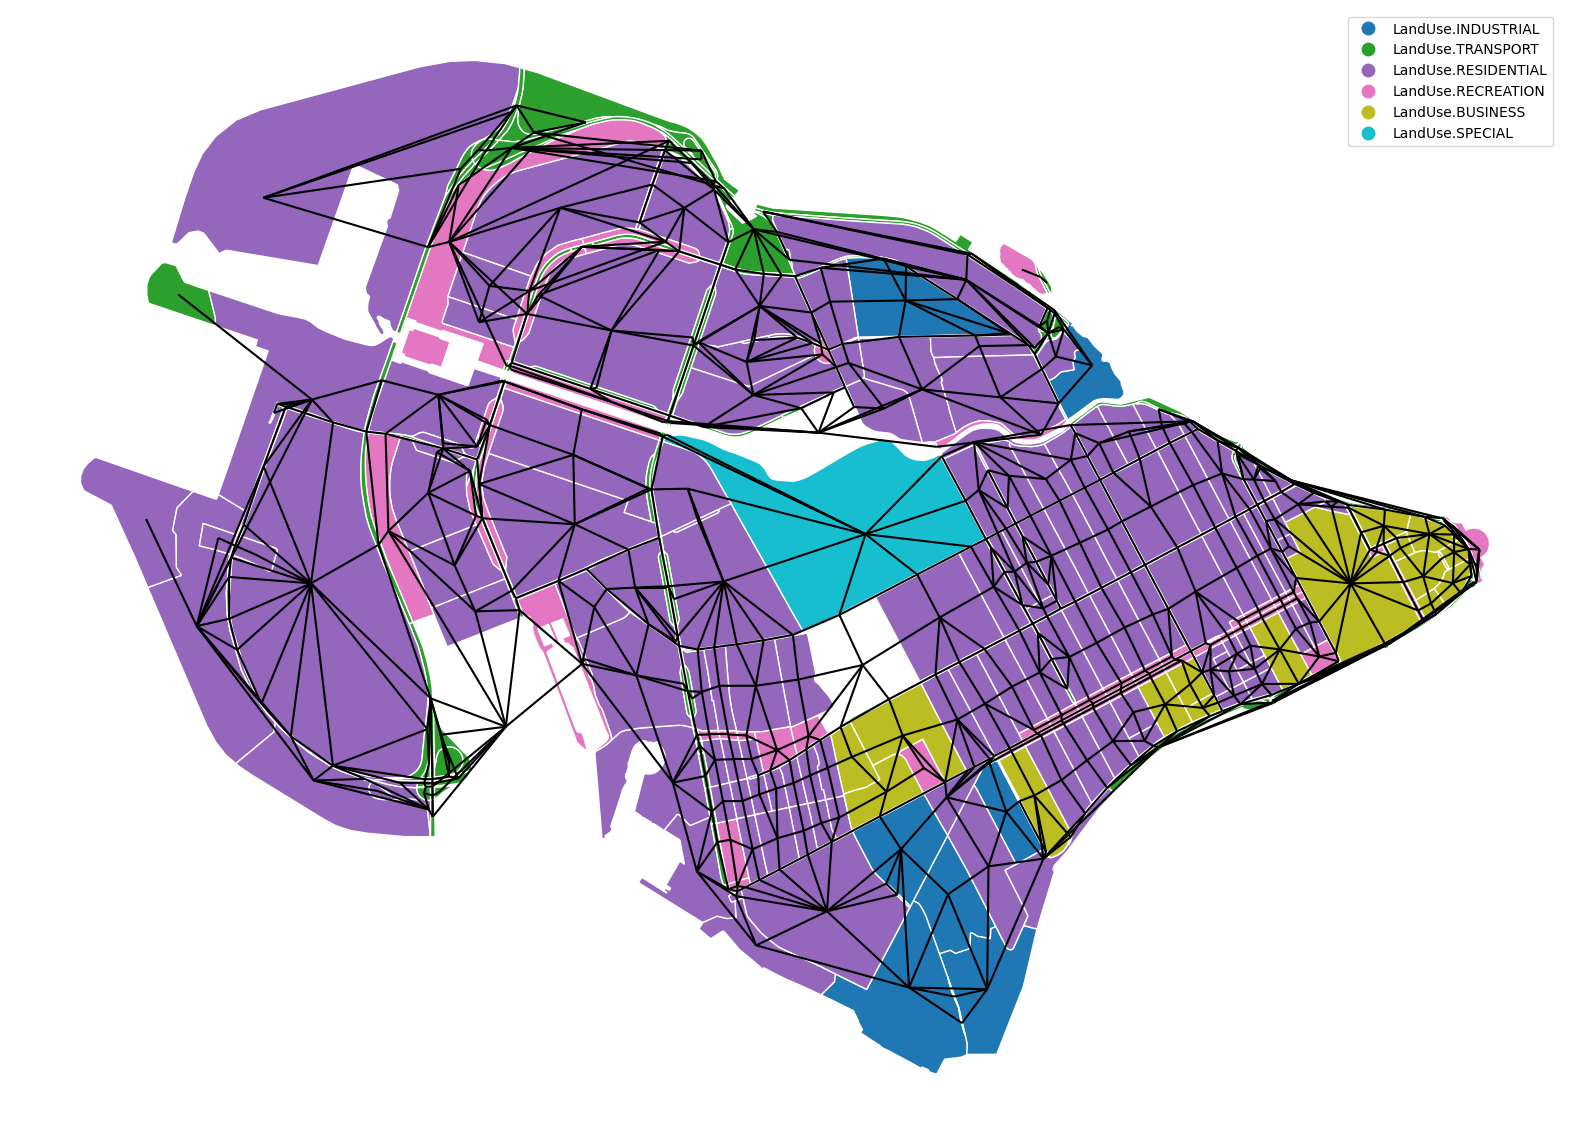

In [2]:
import random
from lu_igi.model import Model, LAND_USE_NAME
from lu_igi.land_use import LandUse

blocks_gdf[LAND_USE_NAME] = blocks_gdf['land_use'].apply(lambda lu : LandUse[lu] if lu is not None else None)
model = Model(blocks_gdf)
model.plot()

## Genetics

Selecting territory to be changed

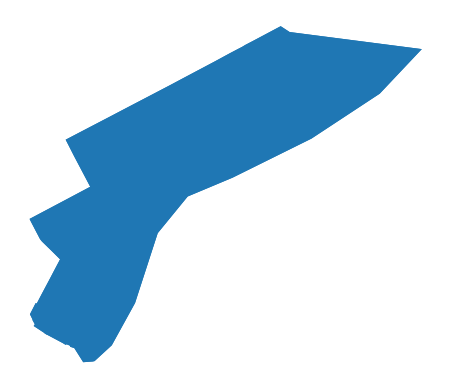

In [3]:
territory_gdf = ox.features_from_place('Санкт-Петербург', tags={'name':'округ № 7'}).to_crs(blocks_gdf.crs)
territory_gdf.plot().set_axis_off()

In [4]:
from lu_igi.pygad_optimizer import PygadOptimizer

PygadOptimizer = PygadOptimizer(model)

In [11]:
target_lu_shares = {
    LandUse.RESIDENTIAL : 0.5,
    LandUse.RECREATION : 0.3,
    LandUse.BUSINESS : 0.2
}

blocks_gdf, ga_instance = PygadOptimizer.run(territory_gdf, target_lu_shares, 100, 1000, 10)

  0%|          | 0/1000 [00:00<?, ?it/s]/home/vasilstar/lu-igi/.venv/lib/python3.10/site-packages/pygad/pygad.py:1145: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.")
100%|██████████| 1000/1000 [04:15<00:00,  3.92it/s]


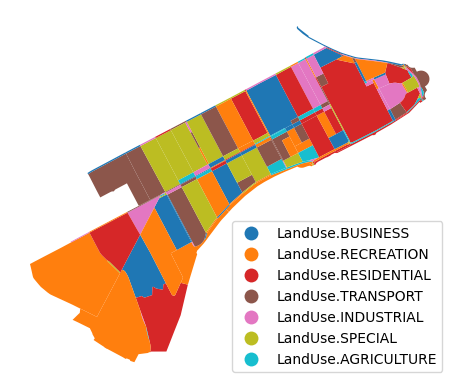

In [12]:
blocks_gdf.plot(column='assigned_land_use', legend=True, legend_kwds={'loc': 'lower right'}).set_axis_off()

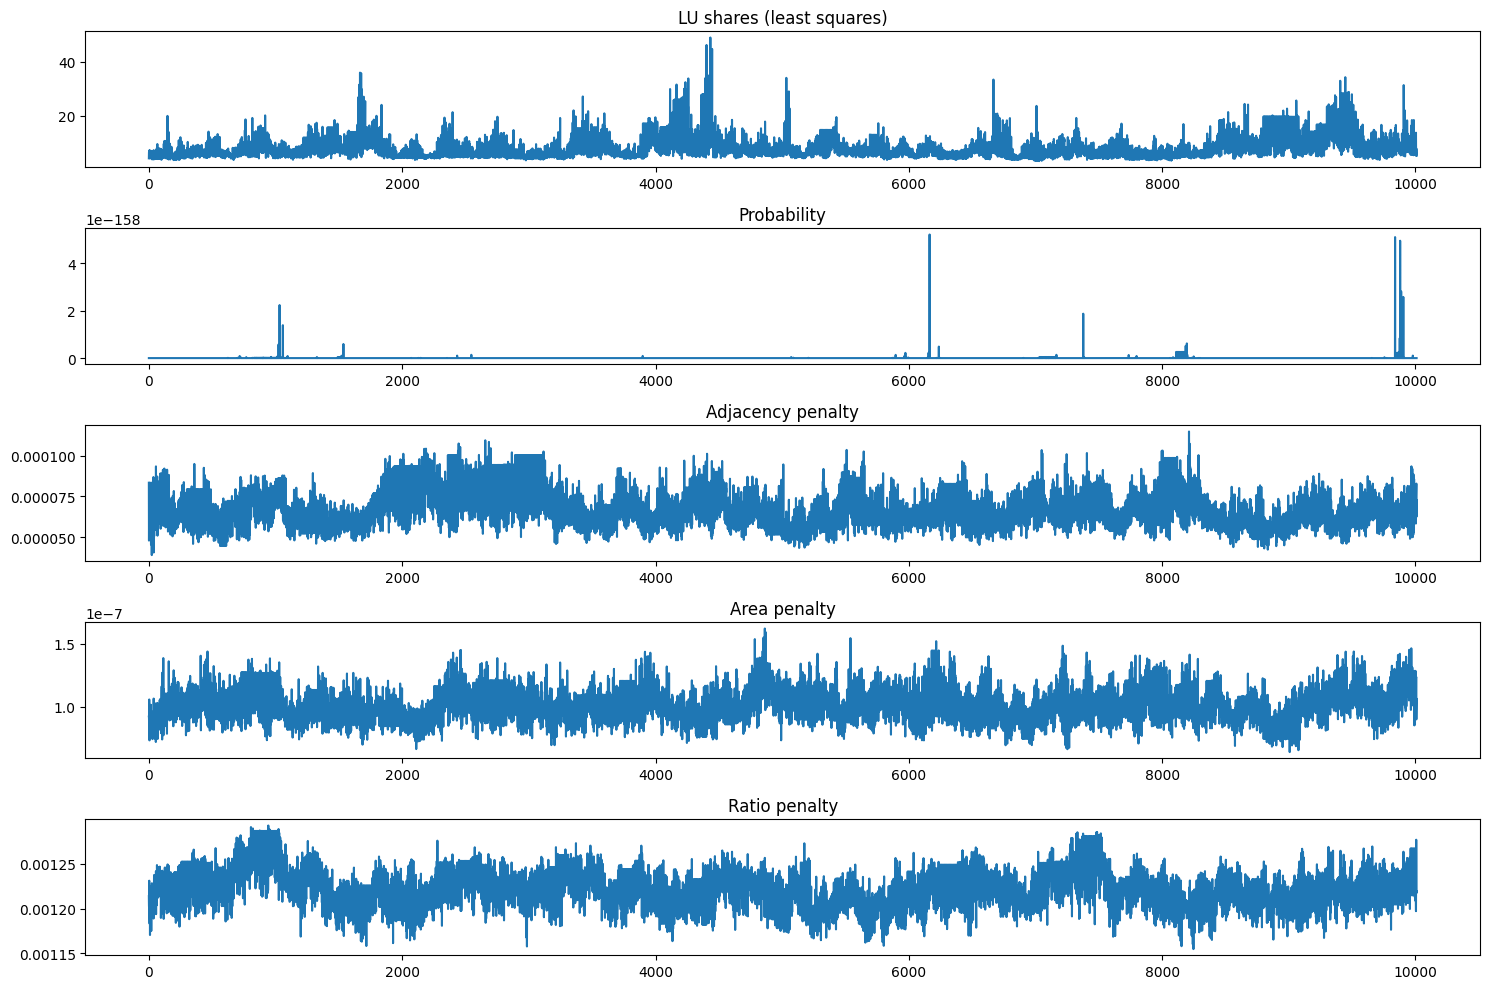

In [13]:
PygadOptimizer.plot_fitness(ga_instance)